In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
%pwd

'r:\\Projects\\Flight_Price_Prediction_ML\\Flight-Price-Prediction-ML-model\\research'

Reading DataSet

In [4]:
df = pd.read_excel('Data.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# finding null values in columns
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# No of rows and columns
df.shape

(10683, 11)

In [8]:
# finding the null value row
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
# dropping the row
df = df.dropna()

In [10]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
# unique Airlines

df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)


Extract time component from date of journey,Depature,Arrival time

In [13]:
#creating columns for month,year,day of journey

df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)
df['Journey_month'] = df.Date_of_Journey.dt.month
df['Journey_year'] = df.Date_of_Journey.dt.year
df['Journey_day'] = df.Date_of_Journey.dt.day
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_year,Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,2019,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,2019,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,2019,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,2019,1


In [14]:
# creating columns for hours,min for depature and arrival time
df.Dep_Time = pd.to_datetime(df.Dep_Time)
df['Dep_Time_hours'] = df.Dep_Time.dt.hour
df['Dep_Time_mins'] = df.Dep_Time.dt.minute
df.Arrival_Time = pd.to_datetime(df.Arrival_Time)
df['Arrival_Time_hours'] = df.Arrival_Time.dt.hour
df['Arrival_Time_mins'] = df.Arrival_Time.dt.minute
df.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_year,Journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-07-14 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-14 05:50:00,2024-07-14 13:15:00,7h 25m,2 stops,No info,7662,5,2019,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-14 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,2019,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-07-14 18:05:00,2024-07-14 23:30:00,5h 25m,1 stop,No info,6218,5,2019,12,18,5,23,30


In [15]:
df = df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_year,Journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,2019,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,2019,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,2019,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,2019,1,16,50,21,35


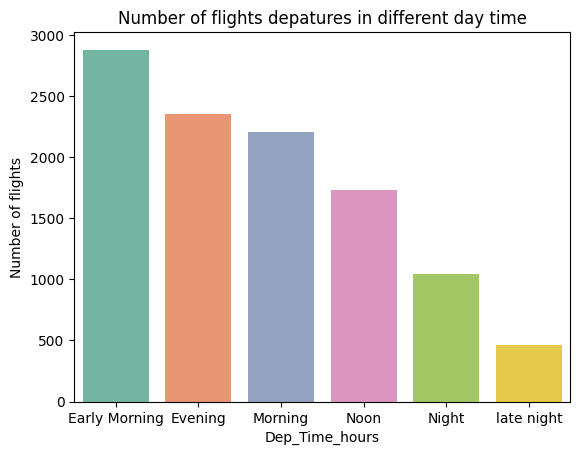

In [16]:
# Plot for number of flights depatures in different day time

def map_time(x):
    if (x>4) and (x<=8):
          return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

sns.barplot(df.Dep_Time_hours.apply(map_time).value_counts(),palette='Set2')
plt.title('Number of flights depatures in different day time')
plt.ylabel('Number of flights')
plt.show()

In [17]:
def duration_hours(x):
  if 'h' in x:
    return int(x.split('h')[0])
  else:
    return 0


def duration_mins(x):
  if 'h' in x and 'm' in x:
    return int(x.split(' ')[1].split('m')[0])

  elif 'm' in x:
    return int(x.split('m')[0])

  else:
    return 0


df['Duration_hours'] = df['Duration'].apply(duration_hours)
df['Duration_minutes'] = df['Duration'].apply(duration_mins)


def total_mins(x):
  total = x['Duration_hours']*60 + x['Duration_minutes']
  return total

df['Duration_total_minutes'] = df.apply(total_mins,axis=1)

df = df.drop('Duration',axis=1)

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_year,Journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_minutes,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,2019,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,2019,1,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,2019,9,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,2019,12,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,2019,1,16,50,21,35,4,45,285


Duration of flight impacts price or not?

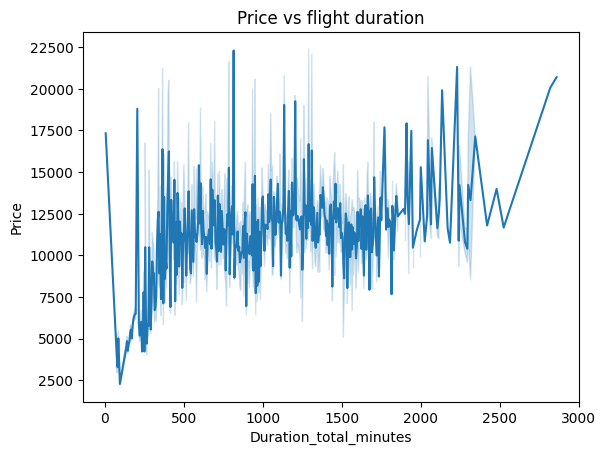

'As we can see slope is positive so, price of flight is proportional to flight duration time'

In [18]:
sns.lineplot(x=df.Duration_total_minutes,y=df.Price)
plt.title('Price vs flight duration')
plt.show()
print()
print()
'''As we can see slope is positive so, price of flight is proportional to flight duration time'''

Number of Stops effects in price of flight?

In [19]:
df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=False)

Total_Stops
4 stops     17686.000000
3 stops     13112.000000
2 stops     12715.807895
1 stop      10594.123556
non-stop     5024.900315
Name: Price, dtype: float64

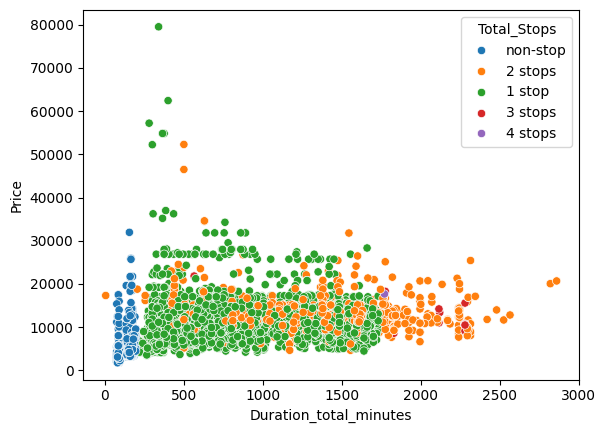



 Non - stop flights take less duration and low fare comparing to other having stops
    As number of stops increases , price also increases 


In [20]:
sns.scatterplot(x=df.Duration_total_minutes,y=df.Price,hue=df.Total_Stops)
plt.show()
print()
print()
print(''' Non - stop flights take less duration and low fare comparing to other having stops
    As number of stops increases , price also increases ''')

Which Airline is costliest?

In [21]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_month', 'Journey_year',
       'Journey_day', 'Dep_Time_hours', 'Dep_Time_mins', 'Arrival_Time_hours',
       'Arrival_Time_mins', 'Duration_hours', 'Duration_minutes',
       'Duration_total_minutes'],
      dtype='object')

In [22]:
# Top 5 routes for airlines

routes= df.groupby('Route').size().sort_values(ascending=False)[:5].index
routes

Index(['DEL → BOM → COK', 'BLR → DEL', 'CCU → BOM → BLR', 'CCU → BLR',
       'BOM → HYD'],
      dtype='object', name='Route')

In [23]:
print('Average cost of flight of each airlines for particular route')
print()

print("Route = 'DEL → BOM → COK'\n",df[df.Route == 'DEL → BOM → COK'].groupby('Airline')['Price'].mean().sort_values(ascending=False))
print()

print("Route = 'BLR → DEL'\n",df[df.Route == 'BLR → DEL'].groupby('Airline')['Price'].mean().sort_values(ascending=False))
print()

print("Route = 'CCU → BOM → BLR'\n",df[df.Route == 'CCU → BOM → BLR'].groupby('Airline')['Price'].mean().sort_values(ascending=False))
print()

print("Route = 'CCU → BLR'\n",df[df.Route == 'CCU → BLR'].groupby('Airline')['Price'].mean().sort_values(ascending=False))
print()

print("Route = 'BOM → HYD'\n",df[df.Route == 'BOM → HYD'].groupby('Airline')['Price'].mean().sort_values(ascending=False))
print()


Average cost of flight of each airlines for particular route

Route = 'DEL → BOM → COK'
 Airline
Jet Airways                          12332.048000
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10989.931373
Air India                             9861.717949
IndiGo                                7867.082781
GoAir                                 7118.285714
Name: Price, dtype: float64

Route = 'BLR → DEL'
 Airline
Vistara Premium economy    8881.000000
Air India                  6722.291139
Jet Airways                6500.714660
Vistara                    5957.505682
IndiGo                     5059.037267
GoAir                      4767.033708
Air Asia                   4574.280899
SpiceJet                   4302.196532
Name: Price, dtype: float64

Route = 'CCU → BOM → BLR'
 Airline
Jet Airways    11647.884946
IndiGo          9319.000000
Air India       8710.641026
GoAir           7219.777778
Name: Price, dtype: float64

Route = 'CCU → BLR'
 Airline

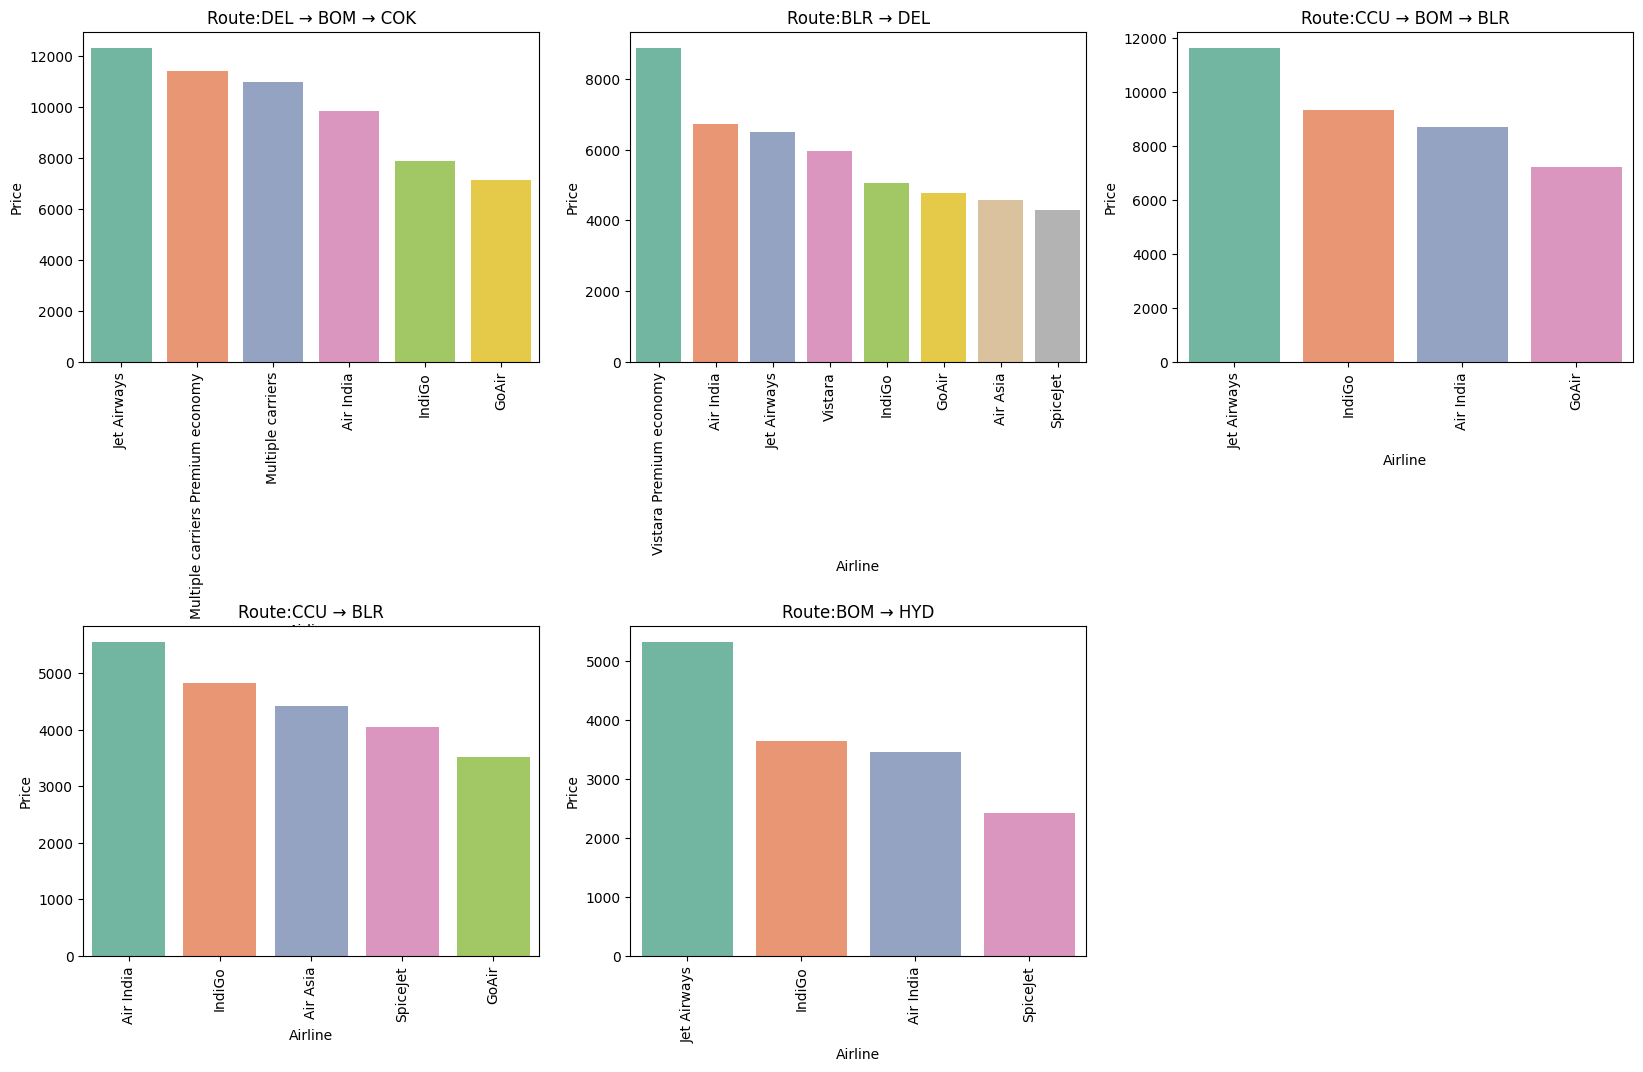


Interpretation:
 As we can see JET AIRWAYS is most costly than other flights


In [24]:
plt.figure(figsize=(20,12))


for i,route in enumerate(routes,start=1):
  plt.subplot(2,3,i)
  sns.barplot(df[df.Route == route].groupby('Airline')['Price'].mean().sort_values(ascending=False),palette='Set2')
  plt.title(f"Route:{route}")
  plt.xticks(rotation=90)
  plt.xlabel('Airline')

plt.subplots_adjust(hspace=0.8)
plt.show()

print()


print("Interpretation:")
print(''' As we can see JET AIRWAYS is most costly than other flights''')

Handling Categorical Data

Nominal Data (OneHotEncoder): Nominal data refers to categorical data that do not have any inherent order or ranking. When encoding nominal data, each category is transformed into a binary vector (one-hot encoding) where each element represents the presence or absence of that category.

Technique Used: LabelEncoder Explanation: Categories are encoded with integers based on their rank. For example, if there are three categories (Low, Medium, High), the encoding might assign: Low → 0 Medium → 1 High → 2

In [25]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' ]   #categorical columns
num_cols = [col for col in df.columns if df[col].dtype != 'object' ]   #numerical columns

In [26]:
cat_cols

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [27]:
num_cols

['Price',
 'Journey_month',
 'Journey_year',
 'Journey_day',
 'Dep_Time_hours',
 'Dep_Time_mins',
 'Arrival_Time_hours',
 'Arrival_Time_mins',
 'Duration_hours',
 'Duration_minutes',
 'Duration_total_minutes']

In [28]:
len(df.Source.unique())

5

In [29]:
'''since Source have 5 unique values we can apply onehot encoder'''

from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder()
encoded = encode.fit_transform(df[['Source']]).toarray()
# Create DataFrame with encoded data
encoded_df = pd.DataFrame(encoded, columns=encode.get_feature_names_out(['Source']))

df = pd.concat([df,encoded_df],axis=1)

df = df.dropna()

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_year,Journey_day,...,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,3.0,2019.0,24.0,...,1.0,10.0,2.0,50.0,170.0,1.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,5.0,2019.0,1.0,...,13.0,15.0,7.0,25.0,445.0,0.0,0.0,0.0,1.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,6.0,2019.0,9.0,...,4.0,25.0,19.0,0.0,1140.0,0.0,0.0,1.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5.0,2019.0,12.0,...,23.0,30.0,5.0,25.0,325.0,0.0,0.0,0.0,1.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,3.0,2019.0,1.0,...,21.0,35.0,4.0,45.0,285.0,1.0,0.0,0.0,0.0,0.0


In [30]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [31]:
len(df.Airline.unique())

12

In [32]:
''' We will apply Label encoding here for Airlines becauses there are 13 airlines
    Label encoding will assign arbitary integer values to column data. There are no order in data '''


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded = encoder.fit_transform(df[['Airline']])
df['Airline label'] = encoded


In [33]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_year,Journey_day,...,Arrival_Time_mins,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline label
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,3.0,2019.0,24.0,...,10.0,2.0,50.0,170.0,1.0,0.0,0.0,0.0,0.0,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,5.0,2019.0,1.0,...,15.0,7.0,25.0,445.0,0.0,0.0,0.0,1.0,0.0,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,6.0,2019.0,9.0,...,25.0,19.0,0.0,1140.0,0.0,0.0,1.0,0.0,0.0,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5.0,2019.0,12.0,...,30.0,5.0,25.0,325.0,0.0,0.0,0.0,1.0,0.0,3
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,3.0,2019.0,1.0,...,35.0,4.0,45.0,285.0,1.0,0.0,0.0,0.0,0.0,3


In [34]:
# Create a dictionary mapping original values to encoded values
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(label_mapping)

{'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11}


In [35]:
df = df.drop('Airline',axis=1)

In [36]:
df.Destination.unique()


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [37]:

# New delhi and delhi both are same and have only one airport for now so we will consider both name is same

df.Destination = df.Destination.replace('Delhi','New Delhi')



In [38]:
df.Destination.unique()


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [39]:
''' We will apply Label encoding here for Airlines becauses there are 13 airlines
    Label encoding will assign arbitary integer values to column data. There are no order in data '''


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded = encoder.fit_transform(df[['Destination']])
df['Destination label'] = encoded


In [40]:
# label encoding values for each destination label
dict(df[['Destination','Destination label']].value_counts().index)

{'Cochin': 1, 'Banglore': 0, 'New Delhi': 4, 'Hyderabad': 2, 'Kolkata': 3}

In [41]:
df.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_year,Journey_day,Dep_Time_hours,...,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline label,Destination label
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,3.0,2019.0,24.0,22.0,...,2.0,50.0,170.0,1.0,0.0,0.0,0.0,0.0,3,4
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,5.0,2019.0,1.0,5.0,...,7.0,25.0,445.0,0.0,0.0,0.0,1.0,0.0,1,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,6.0,2019.0,9.0,9.0,...,19.0,0.0,1140.0,0.0,0.0,1.0,0.0,0.0,4,1
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5.0,2019.0,12.0,18.0,...,5.0,25.0,325.0,0.0,0.0,0.0,1.0,0.0,3,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,3.0,2019.0,1.0,16.0,...,4.0,45.0,285.0,1.0,0.0,0.0,0.0,0.0,3,4


In [42]:
# Remove unecessary columns

# Source column : we have used one hot encoder
# Destination column: we have used label encoding
# Additional_Info info: as most of data it contains is 'no-info

df = df.drop(['Source','Destination','Additional_Info'],axis=1)
df.head(5)

,Route,Total_Stops,Price,Journey_month,Journey_year,Journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline label,Destination label
0,BLR → DEL,non-stop,3897.0,3.0,2019.0,24.0,22.0,20.0,1.0,10.0,2.0,50.0,170.0,1.0,0.0,0.0,0.0,0.0,3,4
1,CCU → IXR → BBI → BLR,2 stops,7662.0,5.0,2019.0,1.0,5.0,50.0,13.0,15.0,7.0,25.0,445.0,0.0,0.0,0.0,1.0,0.0,1,0
2,DEL → LKO → BOM → COK,2 stops,13882.0,6.0,2019.0,9.0,9.0,25.0,4.0,25.0,19.0,0.0,1140.0,0.0,0.0,1.0,0.0,0.0,4,1
3,CCU → NAG → BLR,1 stop,6218.0,5.0,2019.0,12.0,18.0,5.0,23.0,30.0,5.0,25.0,325.0,0.0,0.0,0.0,1.0,0.0,3,0
4,BLR → NAG → DEL,1 stop,13302.0,3.0,2019.0,1.0,16.0,50.0,21.0,35.0,4.0,45.0,285.0,1.0,0.0,0.0,0.0,0.0,3,4


In [43]:
df.Total_Stops.unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [44]:
stops_labels = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

df['Total_Stops_label'] = df['Total_Stops'].map(stops_labels)

In [45]:
df = df.drop('Total_Stops',axis=1)
df = df.drop('Route',axis=1)    # dropping route column as total_stops,source,destination covers the necessary information
df = df.drop('Journey_year',axis=1)   # only 2019 year exists
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   10681 non-null  float64
 1   Journey_month           10681 non-null  float64
 2   Journey_day             10681 non-null  float64
 3   Dep_Time_hours          10681 non-null  float64
 4   Dep_Time_mins           10681 non-null  float64
 5   Arrival_Time_hours      10681 non-null  float64
 6   Arrival_Time_mins       10681 non-null  float64
 7   Duration_hours          10681 non-null  float64
 8   Duration_minutes        10681 non-null  float64
 9   Duration_total_minutes  10681 non-null  float64
 10  Source_Banglore         10681 non-null  float64
 11  Source_Chennai          10681 non-null  float64
 12  Source_Delhi            10681 non-null  float64
 13  Source_Kolkata          10681 non-null  float64
 14  Source_Mumbai           10681 non-null  flo

In [46]:
# changing float values to int
for col in df.columns:
  if df[col].dtype == 'float64':
    df[col]= df[col].astype('int')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Price                   10681 non-null  int32
 1   Journey_month           10681 non-null  int32
 2   Journey_day             10681 non-null  int32
 3   Dep_Time_hours          10681 non-null  int32
 4   Dep_Time_mins           10681 non-null  int32
 5   Arrival_Time_hours      10681 non-null  int32
 6   Arrival_Time_mins       10681 non-null  int32
 7   Duration_hours          10681 non-null  int32
 8   Duration_minutes        10681 non-null  int32
 9   Duration_total_minutes  10681 non-null  int32
 10  Source_Banglore         10681 non-null  int32
 11  Source_Chennai          10681 non-null  int32
 12  Source_Delhi            10681 non-null  int32
 13  Source_Kolkata          10681 non-null  int32
 14  Source_Mumbai           10681 non-null  int32
 15  Airline label           

Outliers detection

Outliers are data points that significantly differ from the majority of data in a dataset. They can be unusually high or low compared to the rest of the data.

Causes:

Measurement errors
Data entry errors
Experimental errors
Natural variability in data

<Axes: ylabel='Price'>

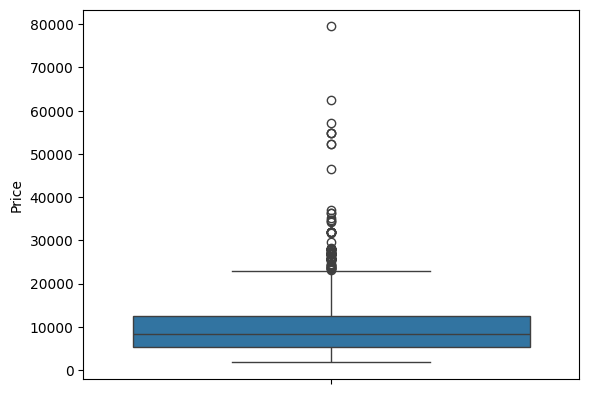

In [48]:
sns.boxplot(df.Price)

In [49]:
# Removing outliers

#Calculate Q1 (25th percentile) and Q3 (75th percentile)

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

In [50]:
#Replacing outliers with median value

df['Price'] = np.where(df['Price']>upper_bound,df['Price'].median(),df['Price'])

In [51]:
df.head()

,Price,Journey_month,Journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline label,Destination label,Total_Stops_label
0,3897.0,3,24,22,20,1,10,2,50,170,1,0,0,0,0,3,4,0
1,7662.0,5,1,5,50,13,15,7,25,445,0,0,0,1,0,1,0,2
2,13882.0,6,9,9,25,4,25,19,0,1140,0,0,1,0,0,4,1,2
3,6218.0,5,12,18,5,23,30,5,25,325,0,0,0,1,0,3,0,1
4,13302.0,3,1,16,50,21,35,4,45,285,1,0,0,0,0,3,4,1


<Axes: ylabel='Price'>

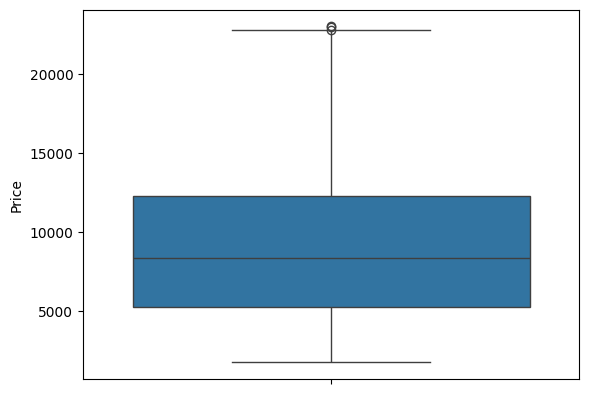

In [52]:
sns.boxplot(df.Price)

Feature selection

In [53]:
df.columns

Index(['Price', 'Journey_month', 'Journey_day', 'Dep_Time_hours',
       'Dep_Time_mins', 'Arrival_Time_hours', 'Arrival_Time_mins',
       'Duration_hours', 'Duration_minutes', 'Duration_total_minutes',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Airline label', 'Destination label',
       'Total_Stops_label'],
      dtype='object')

In [54]:
X = df.drop('Price',axis=1)
y = df.Price

In [55]:
df.head()

,Price,Journey_month,Journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline label,Destination label,Total_Stops_label
0,3897.0,3,24,22,20,1,10,2,50,170,1,0,0,0,0,3,4,0
1,7662.0,5,1,5,50,13,15,7,25,445,0,0,0,1,0,1,0,2
2,13882.0,6,9,9,25,4,25,19,0,1140,0,0,1,0,0,4,1,2
3,6218.0,5,12,18,5,23,30,5,25,325,0,0,0,1,0,3,0,1
4,13302.0,3,1,16,50,21,35,4,45,285,1,0,0,0,0,3,4,1


In [56]:
'''
The mutual_info_regression function works by estimating the mutual information (MI) between each feature and the target variable in a regression setting

Mutual Information (MI):

MI is a non-parametric measure of the dependency between variables.
It can capture any kind of relationship, including non-linear relationships.
If MI is zero, the variables are independent.

Estimation Method:
The function uses the k-nearest neighbors (k-NN) method to estimate the MI.
The k-NN method is used to estimate the probability density function (PDF) of the variables.

'''

from sklearn.feature_selection import mutual_info_regression

data = mutual_info_regression(X,y)

pd.DataFrame(data,index=X.columns,columns=['Importance']).sort_values('Importance',ascending=False)

,Importance
Duration_total_minutes,1.771166
Airline label,1.312764
Arrival_Time_hours,1.134723
Duration_hours,1.115519
Destination label,1.053814
Dep_Time_hours,0.924941
Arrival_Time_mins,0.896884
Total_Stops_label,0.789167
Dep_Time_mins,0.746589
Duration_minutes,0.675070


Model Training

In [57]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=1)


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


DTR = DecisionTreeRegressor()
ABR = AdaBoostRegressor()
RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()
XGB = XGBRegressor()

algos = {"Decision Tree Reg":DTR,"Adaboost Reg":ABR,"Random Forest Reg":RFR,"Gradient Boost Reg":GBR,"XGB Boost":XGB}


def algo_model_train(algos,X_train,X_test,y_train,y_test):
    for key,algo in algos.items():
      algo.fit(X_train,y_train)
      y_pred = algo.predict(X_test)
      print(key, "score:",r2_score(y_test,y_pred))

In [58]:
algo_model_train(algos,X_train,X_test,y_train,y_test)

Decision Tree Reg score: 0.6747252698597193
Adaboost Reg score: 0.5807249748389272
Random Forest Reg score: 0.7973318946606937
Gradient Boost Reg score: 0.7497941377290737
XGB Boost score: 0.8206322094171177


In [59]:
# we can choose XGB boost regressor for the model training

Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
params = {
    'n_estimators': [150,180,200],
    'max_depth': [4, 6, 8,10],
    'learning_rate': [0.01, 0.1, 0.2],
}



reg = GridSearchCV(XGBRegressor(),param_grid=params,cv=5,verbose=3)
reg.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=150;, score=0.642 total time=   3.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=150;, score=0.633 total time=   0.5s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=150;, score=0.653 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=150;, score=0.647 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=150;, score=0.649 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=180;, score=0.669 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=180;, score=0.660 total time=   0.7s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=180;, score=0.681 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=180;, score=0.675 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=180;, score=0.6

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [150, 180, 200]},
             verbose=3)

In [61]:
reg.best_score_

0.8146887944880776

In [62]:
reg.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}

In [63]:
reg = reg.best_estimator_
reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
y_pred = reg.predict(X_test)

In [65]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def evaluation_score(y_test,y_pred):
  print("r2_sore:",r2_score(y_test,y_pred))
  print("mean_squared_error:",mean_squared_error(y_test,y_pred))
  print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

evaluation_score(y_test,y_pred)

r2_sore: 0.8219943016859357
mean_squared_error: 2971786.3995654993
mean_absolute_error: 1185.4952200236446


In [66]:
values = [3,24,22,20,1,10,2,50,170,1,0,0,0,0,3,4,0]
reg.predict([values])

array([5096.0664], dtype=float32)

DatatransformationPredictionPipeline

In [67]:
import numpy

def data_transformation(df_,df):

    df_ = df_.dropna()
    #creating columns for month,year,day of journey

    df_.Date_of_Journey = pd.to_datetime(df_.Date_of_Journey)
    df_['Journey_month'] = df_.Date_of_Journey.dt.month
    df_['Journey_year'] = df_.Date_of_Journey.dt.year
    df_['Journey_day'] = df_.Date_of_Journey.dt.day


    # creating columns for hours,min for depature and arrival time
    df_.Dep_Time = pd.to_datetime(df_.Dep_Time)
    df_['Dep_Time_hours'] = df_.Dep_Time.dt.hour
    df_['Dep_Time_mins'] = df_.Dep_Time.dt.minute
    df_.Arrival_Time = pd.to_datetime(df_.Arrival_Time)
    df_['Arrival_Time_hours'] = df_.Arrival_Time.dt.hour
    df_['Arrival_Time_mins'] = df_.Arrival_Time.dt.minute


    df_ = df_.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)

    def duration_hours(x):
      if 'h' in x:
        return int(x.split('h')[0])
      else:
        return 0


    def duration_mins(x):
      if 'h' in x and 'm' in x:
        return int(x.split(' ')[1].split('m')[0])

      elif 'm' in x:
        return int(x.split('m')[0])

      else:
        return 0


    df_['Duration_hours'] = df_['Duration'].apply(duration_hours)
    df_['Duration_minutes'] = df_['Duration'].apply(duration_mins)


    def total_mins(x):
      total = x['Duration_hours']*60 + x['Duration_minutes']
      return total

    df_['Duration_total_minutes'] = df_.apply(total_mins,axis=1)

    df_ = df_.drop('Duration',axis=1)


    cat_cols = [col for col in df_.columns if df_[col].dtype == 'object' ]   #categorical columns
    num_cols = [col for col in df_.columns if df_[col].dtype != 'object' ]   #numerical columns


    sources = df.Source.unique()

    for source in sources:
      df_['Source_'+source] = np.nan
      df_['Source_'+source] = np.where(df_['Source']==source,1,0)


    df_['Airline label'] = np.nan
    airlines = {'Air Asia': 0,
                'Air India': 1,
                'GoAir': 2,
                'IndiGo': 3,
                'Jet Airways': 4,
                'Jet Airways Business': 5,
                'Multiple carriers': 6,
                'Multiple carriers Premium economy': 7,
                'SpiceJet': 8,
                'Trujet': 9,
                'Vistara': 10,
                'Vistara Premium economy': 11}

    df_['Airline label'] = df_['Airline'].map(airlines)
    df_ = df_.drop('Airline',axis=1)


    destinations = {'Cochin': 1,
                    'Banglore': 0,
                    'New Delhi': 4,
                    'Hyderabad': 2,
                    'Kolkata': 3}

    df_.Destination = df_.Destination.replace('Delhi','New Delhi')

    df_['Destination label'] = df_.Destination.map(destinations)


    df_ = df_.drop(['Source','Destination','Additional_Info'],axis=1)

    stops_labels = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

    df_['Total_Stops_label'] = df_['Total_Stops'].map(stops_labels)

    df_['Total_Stops_label'] = df_['Total_Stops_label'].astype('int')

    df_ = df_.drop('Total_Stops',axis=1)

    df_ = df_.drop('Route',axis=1)

    df_ = df_.drop('Journey_year',axis=1)   # only 2019 year exists

    return df_



In [68]:
# sample data
d = {'Airline': {0: 'IndiGo'},
 'Date_of_Journey': {0: '24/03/2019'},
 'Source': {0: 'Banglore'},
 'Destination': {0: 'New Delhi'},
 'Route': {0: 'BLR → DEL'},
 'Dep_Time': {0: '22:20'},
 'Arrival_Time': {0: '01:10 '},
 'Duration': {0: '2h 50m'},
 'Total_Stops': {0: 'non-stop'},
 'Additional_Info': {0: 'No info'},
    }

df_ = pd.DataFrame(d)



In [69]:
data_transformed = data_transformation(df_,pd.read_excel('Data.xlsx'))

In [70]:
data_transformed

,Journey_month,Journey_day,Dep_Time_hours,Dep_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Airline label,Destination label,Total_Stops_label
0,3,24,22,20,1,10,2,50,170,1,0,0,0,0,3,4,0
